# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### A. Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.35$ and a fixed random state = $42$.
2. Fit and visualize a decision tree classifier. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        


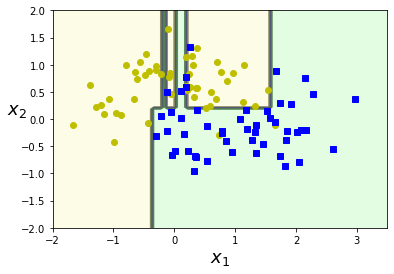

In [3]:
#Answewr here
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X , y = make_moons(n_samples = 100 , noise = 0.35 , random_state = 42 )

clf = DecisionTreeClassifier()
clf.fit(X,y)

plot_decision_boundary(clf , X , y ,axes = [-2 , 3.5 , -2 , 2])

#### Q. Comment on the overfitting nature of the Decision trees

From the above decision boundary plot, we can see that the decision tree without any control on the hyperparameters is overfitting on the data. It completely distorts the shape of the decision boundary in order to accommodate one point of opposite class amidst a bunch of like class points.

### B. Overfitting in decision tree classifiers

1. List and explain in a few lines, three of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
2. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 
3. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $5$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

Three parameters which could help reduce overfitting while building a decision tree are as follows :

1) Maximum Depth of a decision tree. If the maximum depth of the tree is not specified, then the model will have the freedom to go to any depth possible so as to fit the most optimal tree on the training data. Therefore, by restricting the maximum depth, we are in a way redcing the number of conditions which the model can impose thereby reducing the complexity of the model.

2) Minimum sample split. This refers to the minimum number of samples needed in order to split the node further. Without having a limit on this, the model can in theory keep splitting the nodes until there are only two samples in the node. This will result in overfitting the data. However, having a minimum limit on the number of samples will prevent such leafs which have just one sample thereby reducing the possibility of overfitting.

3) Minimum sample leaves. This is the minimum number of samples which must be present under any given leaf in the decision tree. This helps to prevent overfitting by preventing the splits at nodes wherein the leaves will have samples smaller than a certain number. Tuning this parameter will have a smoothing effect on training of the model.

## Impact of min_samples_leaf on decision tree

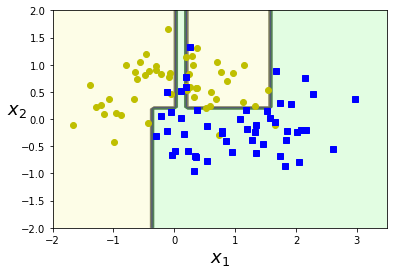

In [4]:
#Answer here
clf_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf = 4)
clf_min_samples_leaf.fit(X,y)

plot_decision_boundary(clf_min_samples_leaf , X , y ,axes = [-2 , 3.5 , -2 , 2])

The model with the hyperparameter min_samples_leaf set to 4 will perform better than the model without any hyperparameters set.

## Impact of max_depth on decision tree

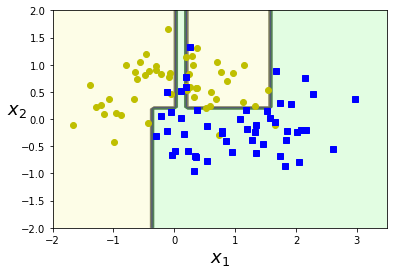

In [5]:
clf_max_depth = DecisionTreeClassifier(max_depth = 5)
clf_max_depth.fit(X,y)

plot_decision_boundary(clf_max_depth , X , y ,axes = [-2 , 3.5 , -2 , 2])

The model with hyperparameter max_depth of nodes set to 4 will perform better than the model without any hyperparameters set on the test data. This is because the former model will have less overfitting in it as seen from the plot owing to the constaraint of the max depth being 4.

#### Q. Comment on the boundary surface of the decision tree. 
Hint: Observe the orthogonality of the boundary

From the plots, we can see that the decision boundary lines are either horizontal or vertical lines alone. This owing to the fact that the decision tree at each decision is splitting the region into two halfs in which case the decision boundary lines will either be horizontal or veritcal at a given point.

### C. Linear classifiers vs decision tree classifiers

In [47]:
#Generate 100 points [x1, x2] in the 2D plane using np.random.rand() for -0.5<x1<0.5 and -0.5<x2<0.5
np.random.seed(42)
x = np.random.rand(100,2) - 0.5
y = np.zeros(100)
#Assign a label of 1 to all points having x1>0.0 and 0 otherwise
y[x[:,0]>0] = 1
#Rotate the dataset by 45 degrees in the [x1,x2] plane
rot = [[0.414,-0.414],[0.414,0.414]]
x_rot = np.matmul(rot,x.T)
x_rot = x_rot.T

1. Fit a linear Logistic Regression model and Decision Tree on the x_rot
2. Fit a linear Logistic Regression model and Decision tree on the make_moons dataset generated in A(1)


### Logistic and Decision Tree on x_rot

Accuracy on Cross Validation for Logistic Classifier :  0.9800000000000001


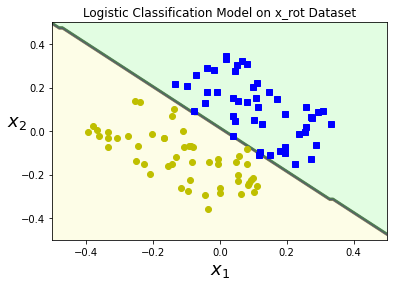

Accuracy on Cross Validation for Decision Tree Classifier :  0.9516666666666665


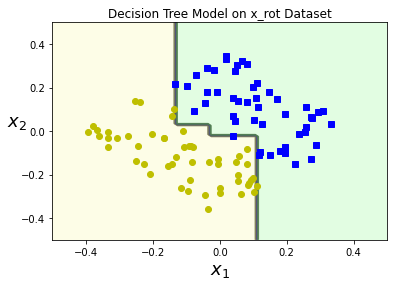

In [55]:
#Answer here
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

clf_logistic = LogisticRegression()
clf_tree = DecisionTreeClassifier()

cv_logistic = cross_validate(clf_logistic , x_rot , y , cv = 10 , scoring = 'balanced_accuracy')
cv_tree = cross_validate(clf_tree , x_rot , y , cv = 10 , scoring = 'balanced_accuracy')

print('Accuracy on Cross Validation for Logistic Classifier : ',np.mean(cv_logistic['test_score']))
clf_logistic.fit(x_rot , y)
plot_decision_boundary(clf_logistic , x_rot , y ,axes = [-0.5 , 0.5 , -0.5 , 0.5] , legend = False)
plt.title('Logistic Classification Model on x_rot Dataset')
plt.show()

print('Accuracy on Cross Validation for Decision Tree Classifier : ',np.mean(cv_tree['test_score']))
clf_tree.fit(x_rot,y)
plot_decision_boundary(clf_tree , x_rot , y ,axes = [-0.5 , 0.5 , -0.5 , 0.5] , legend = False)
plt.title('Decision Tree Model on x_rot Dataset')
plt.show()

### Logistic and Decision Tree on make_moons dataset

Accuracy on Cross Validation for Logistic Classifier :  0.8400000000000001


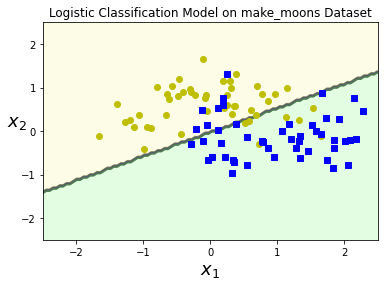

Accuracy on Cross Validation for Decision Tree Classifier with no hyperparameters :  0.8300000000000001


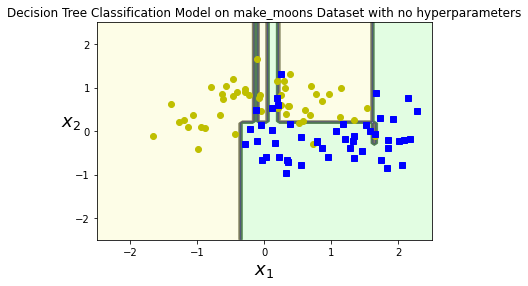

Accuracy on Cross Validation for Decision Tree Classifier with optimized hyperparameters:  0.9


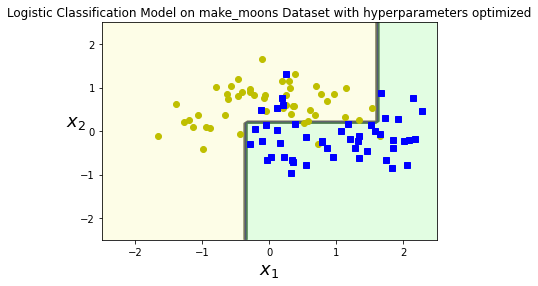

In [56]:
#Answer here
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_moon , y_moon = make_moons(n_samples = 100 , noise = 0.35 , random_state = 42 )

clf_logistic = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_tree_optimized = DecisionTreeClassifier(max_depth =4)

cv_logistic = cross_validate(clf_logistic , X_moon , y_moon , cv = 10 ,scoring = 'balanced_accuracy')
cv_tree = cross_validate(clf_tree , X_moon , y_moon , cv = 10 , scoring = 'balanced_accuracy')
cv_tree_optimized = cross_validate(clf_tree_optimized , X_moon , y_moon , cv = 10 , scoring = 'balanced_accuracy')

print('Accuracy on Cross Validation for Logistic Classifier : ',np.mean(cv_logistic['test_score']))
clf_logistic.fit(X_moon , y_moon)
plot_decision_boundary(clf_logistic , X_moon , y_moon ,axes = [-2.5 , 2.5 , -2.5 , 2.5] , legend = False)
plt.title('Logistic Classification Model on make_moons Dataset')
plt.show()

print('Accuracy on Cross Validation for Decision Tree Classifier with no hyperparameters : ',np.mean(cv_tree['test_score']))
clf_tree.fit(X_moon , y_moon)
plot_decision_boundary(clf_tree , X_moon , y_moon ,axes = [-2.5 , 2.5 , -2.5 , 2.5] , legend = False)
plt.title('Decision Tree Classification Model on make_moons Dataset with no hyperparameters')
plt.show()

print('Accuracy on Cross Validation for Decision Tree Classifier with optimized hyperparameters: ',np.mean(cv_tree_optimized['test_score']))
clf_tree_optimized.fit(X_moon , y_moon)
plot_decision_boundary(clf_tree_optimized , X_moon , y_moon ,axes = [-2.5 , 2.5 , -2.5 , 2.5] , legend = False)
plt.title('Logistic Classification Model on make_moons Dataset with hyperparameters optimized')
plt.show()


#### Q. Compare the performance of Decision Trees and logistic regression on the two datasets

The accuracy numbers are varying dependent on the random seed we take for x_rot generation. However, we can say that when there little overlap between the classes as in x_rot dataset, we can see that both the methods reach to about the same accuracy. However, we can see that the decision boundary of logistic regression model better represents the model over decision tree as it is able to generate decision boundaries with a slope whereas in case of decision tree, the decision boundary lines are always parallel to x or y axis at any point. Since the data is linearly separable, the logistic regression performs better.

In the case of the make_moons dataset, there is overlap between the classes owing to which the logistic regression would not be doing such a great job. However, we can see that the unoptimized decision tree boundary is overfitting the data. But, once we introduce the hyperparameters into the mix, we can see that the accuracy increase and the decision boundary as well is smoother. This can be explained by the fact that since the data is only non linearly seperable, decision trees perform better compared to logistic regression.

### D. Regression using decision trees

1. Train a regression tree on the noisy sine dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [10]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Sine + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = np.sin(2*np.pi*X) + np.random.randn(150, 1) / 10

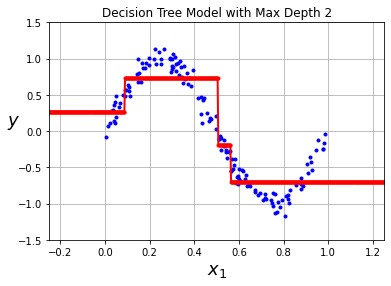

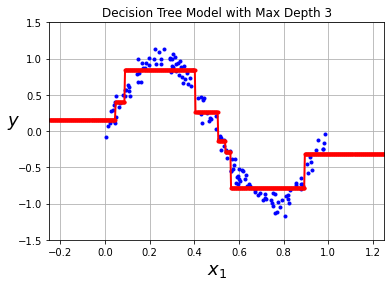

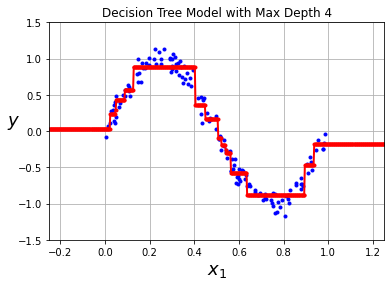

In [11]:
#Answer here
from sklearn.tree import DecisionTreeRegressor

clf_regressor_2 = DecisionTreeRegressor(max_depth = 2)
clf_regressor_2.fit(X,y)
plot_regression_predictions(clf_regressor_2 , X, y ,axes = [-0.25 , 1.25 , -1.5 , 1.5])
plt.grid()
plt.title('Decision Tree Model with Max Depth 2')
plt.show()


clf_regressor_3 = DecisionTreeRegressor(max_depth = 3)
clf_regressor_3.fit(X,y)
plot_regression_predictions(clf_regressor_3 , X, y ,axes = [-0.25 , 1.25 , -1.5 , 1.5])
plt.grid()
plt.title('Decision Tree Model with Max Depth 3')
plt.show()

clf_regressor_4 = DecisionTreeRegressor(max_depth = 4)
clf_regressor_4.fit(X,y)
plot_regression_predictions(clf_regressor_4 , X, y ,axes = [-0.25 , 1.25 , -1.5 , 1.5])
plt.grid()
plt.title('Decision Tree Model with Max Depth 4')
plt.show()

### E. Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 

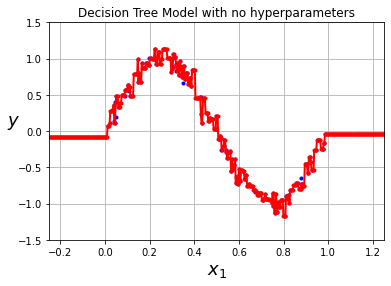

In [12]:
clf_regressor = DecisionTreeRegressor()
clf_regressor.fit(X,y)
plot_regression_predictions(clf_regressor , X, y ,axes = [-0.25 , 1.25 , -1.5 , 1.5])
plt.grid()
plt.title('Decision Tree Model with no hyperparameters')
plt.show()

Yes, similar to decision tree classifiers, when no hyperparameters are used, the decision tree regressors as well tend to overfit. This is owing to the fact that if there are no hyperparameters set, the model will try to fit the absolute best it can with as many number of leafs and depth of the graph as possible.

### F. Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.5$). Random seed = 42 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $35$ for max_leaf_nodes and $2$ to $10$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [19]:
#Answer here
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_moon , y_moon = make_moons(n_samples = 1000 , noise = 0.5 , random_state = 42 )
X_train , X_test , y_train , y_test = train_test_split(X_moon , y_moon , test_size = 0.2, random_state = 42)

max_leaf_nodes_list = [ i for i in range(2,36) ]
min_sample_split_list = [ i for i in range(2,11) ]

parameters = { 'min_samples_split' : min_sample_split_list , 'max_leaf_nodes' : max_leaf_nodes_list}
clf_decision_tree = DecisionTreeClassifier()
clf_grid_search_cv = GridSearchCV(clf_decision_tree , parameters)
clf_grid_search_cv.fit(X_train , y_train)

print(clf_grid_search_cv.best_params_)

{'max_leaf_nodes': 4, 'min_samples_split': 2}


The accuracy on the test data for the optimal parameters obtained : 0.79


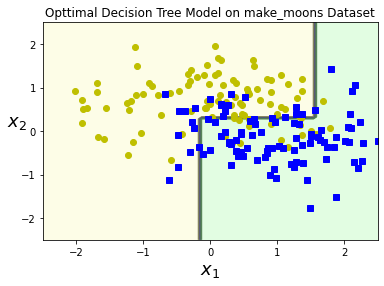

In [20]:
from sklearn.metrics import balanced_accuracy_score

max_leaf_nodes_optimal = 4
min_sample_split_optimal = 2

clf_optimal_classifier = DecisionTreeClassifier(min_samples_split = min_sample_split_optimal , max_leaf_nodes = max_leaf_nodes_optimal)
clf_optimal_classifier.fit(X_train , y_train)

print('The accuracy on the test data for the optimal parameters obtained :',balanced_accuracy_score(y_test, clf_optimal_classifier.predict(X_test)))
plot_decision_boundary(clf_optimal_classifier , X_test , y_test ,axes = [-2.5 , 2.5 , -2.5 , 2.5] , legend = False)
plt.title('Opttimal Decision Tree Model on make_moons Dataset')
plt.show()

### G. Training the Random Forest model
1. Load the loans dataset and use one-hot encoding for the column 'purpose'
2. Split the data into test and train sets with ratio 70:30 with random seed = 101
3. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
4. Predict the class of not.fully.paid for the X_test data
5. Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [57]:
#Answer here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data_loans = pd.read_csv('loan_data.csv')

purpose_df = pd.DataFrame(data_loans , columns = ['purpose'])
one_hot_encoding_purpose = pd.get_dummies(purpose_df , columns = ['purpose'])
data_loans = data_loans.join(one_hot_encoding_purpose)
del data_loans['purpose']
feature_columns = list(data_loans.keys())
feature_columns.remove('not.fully.paid')
target_column = 'not.fully.paid'

X = np.array(data_loans[feature_columns])
y = np.array(data_loans[target_column])

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3,random_state = 101)

In [58]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train , y_train)

print(classification_report(y_test , random_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



No, there is no sort of warning being displayed while execution of the code.